# WeRateDogs Twitter Data Wrangling


#### Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

The goal of this project is to wrangle data from WeRateDogs Twitter's account using Python and document the whole process in a Jupyter Notebook named wrangle_act.ipynb i.e. this notebook. My aim is to wrangle this data for interesting and trustworthy analyses using visualizations
> Perform data wrangling (gathering, assessing and cleaning) on provided thee sources of data.
> Store, analyze, and visualize the wrangled data.
> Reporting on 1) data wrangling efforts and 2) data analyses and visualizations (in separate documents).


### Table of Contents
- Project Objectives
- Step 1: Gathering Data
- Step 2: Assessing Data
-  Step 3: Cleaning Data
-  Analysis and Visualization



## Gathering Data

In [1]:
#import library
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

### Twitter Archive Data

In [2]:
#reads in twitter archives
weRateDogs_Archives = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
weRateDogs_Archives.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Image Predictions Data

In [4]:
#import library
from pathlib import Path as path #for working with path
import requests #for downloading 

In [5]:

#link and filename
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
fileName = 'image-predictions.tsv'

In [6]:
p=path.cwd() / fileName # path
response=requests.get(link) # download image prediction with requests
p.write_bytes(response.content)# save data to path

335079

In [7]:
# Load the 'image-predictions.tsv' file into a dataframe
imagePredictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
#head
imagePredictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### API Tweets Data

In [9]:
p = path.cwd() / 'tweet-json.txt' # create path p
data = [json.loads(line) for line in open(p)] # load in each json data in tweet-json.txt

In [10]:
# initialse empty lists
date=[]
tweet_id = []
retweet_count= []
favorite_count= []
followers_count= []
verified= []

In [11]:
# loop through data and get created_at id retweet_count favorite_count followers_count verified and append to the above empty list
for x in data:
    date.append(x['created_at'])
    tweet_id.append(x['id'])
    retweet_count.append(x['retweet_count'])
    favorite_count.append(x['favorite_count'])
    followers_count.append(x['user']['followers_count']),
    verified.append(x['user']['verified'])

In [12]:
# createa dataframe
apiTweets=pd.DataFrame({
'date':date,
'tweet_id':tweet_id,
'retweet_count':retweet_count,
'favorite_count':favorite_count,
'followers_count':followers_count,
'verified':verified})

## Assessing Data

In [13]:
# show five random smaple
weRateDogs_Archives.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
577,800855607700029440,NaN,NaN,2016-11-22 00:17:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Lin_Manuel: 11/10 would recommend. https:/...,8.008540e+17,79923701.0,2016-11-22 00:10:52 +0000,https://twitter.com/littlewiewel/status/800852...,11,10,None,None,None,None,None
517,810896069567610880,NaN,NaN,2016-12-19 17:14:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He just found out he needs bra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810896069...,11,10,Hunter,None,None,None,None
2280,667393430834667520,NaN,NaN,2015-11-19 17:26:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fwed. He is a Canadian Asian Taylormad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667393430...,8,10,Fwed,None,None,None,None
916,756998049151549440,NaN,NaN,2016-07-23 23:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756998049...,11,10,Oliver,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None


In [14]:
#info
weRateDogs_Archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# show nan in each column
weRateDogs_Archives.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
#show number of duplicate
weRateDogs_Archives.duplicated().sum()

0

In [17]:
#decribe numerical columns
weRateDogs_Archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# show five random smaple
imagePredictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1979,870804317367881728,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,home_theater,0.168290,False,sandbar,0.098040,False,television,0.079729,False
871,697943111201378304,https://pbs.twimg.com/media/Ca-XjfiUsAAUa8f.jpg,1,Great_Dane,0.126924,True,Greater_Swiss_Mountain_dog,0.110037,True,German_short-haired_pointer,0.090816,True
1574,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True
884,698953797952008193,https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg,1,Italian_greyhound,0.382378,True,redbone,0.102255,True,shower_cap,0.076834,False
424,674063288070742018,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,0.661176,False,bearskin,0.214879,False,swab,0.064456,False


In [19]:
#info
imagePredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
#decribe numerical columns
imagePredictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
#show number of duplicate
imagePredictions.duplicated().sum()

0

In [22]:
#info
apiTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             2354 non-null   object
 1   tweet_id         2354 non-null   int64 
 2   retweet_count    2354 non-null   int64 
 3   favorite_count   2354 non-null   int64 
 4   followers_count  2354 non-null   int64 
 5   verified         2354 non-null   bool  
dtypes: bool(1), int64(4), object(1)
memory usage: 94.4+ KB


In [23]:
# show five random smaple
apiTweets.sample(5)

,date,tweet_id,retweet_count,favorite_count,followers_count,verified
1228,Fri Mar 25 17:03:49 +0000 2016,713411074226274305,1440,4802,3200947,True
2311,Tue Nov 17 22:06:57 +0000 2015,666739327293083650,71,244,3201018,True
1534,Wed Jan 20 20:21:00 +0000 2016,689905486972461056,787,2651,3200950,True
1205,Fri Apr 01 02:51:22 +0000 2016,715733265223708672,1920,5093,3200945,True
1441,Mon Feb 08 17:17:22 +0000 2016,696744641916489729,1069,2293,3200950,True


In [24]:
# show nan in each column
apiTweets.isnull().sum()

date               0
tweet_id           0
retweet_count      0
favorite_count     0
followers_count    0
verified           0
dtype: int64

In [25]:
#decribe numerical columns
apiTweets.describe()

,tweet_id,retweet_count,favorite_count,followers_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


### Quality Issues 
**WeRateDogs_Achives**
1. missing records
2. timestamp should be in datetime format and not object
3. source columns contain html link tags
4. the denominator has a max value of 170
**ImagePredictions**

5. p1, p2, and p3 ave lowercase given names
6. img_num are not use full
**ApiTweets**

7. datetime should be of datatime datatype and not object
8. tweet_id should be string instead of int

### Tidiness Issues
1. Combine the 4 dog stage columns into a single column in the archive table
2. merge WeRateDogs_Achives, imagePredictions and apiTweets tables

## Cleaning Data

In [26]:
# Make copies to preserve the original datasets
df1_clean = weRateDogs_Archives.copy()
df2_clean = imagePredictions.copy()
df3_clean = apiTweets.copy()

**1. Define**

 Handle missing records in WeRateDogs_Achives in in_reply_to_status_id in_reply_to_user_id retweeted_status_id retweeted_status_user_id retweeted_status_timestamp

**Code**

In [27]:
# show nan in each column
df1_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [28]:
#drop nan filled columns
df1_clean=df1_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                 'retweeted_status_user_id','retweeted_status_timestamp'])

**Test**

In [29]:
df1_clean.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

**2. Define**

Timestamp should be in datetime format and not object

**Code**

In [30]:
#convert timestamps to datetime
df1_clean['timestamp']= pd.to_datetime(df1_clean['timestamp'])

**Test**

In [31]:
df1_clean['timestamp'].dtypes

datetime64[ns, UTC]

**3. Define**

Source columns containing html link tags should be removed

**Code**

In [32]:
#values conts
df1_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [33]:
#extract without html tags
extract=df1_clean['source'].str.extract('(<.*>)(.*)(<.*)')

In [34]:
#saves back in to source
df1_clean['source']=extract[1]

**Test**

In [35]:
df1_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

**4. Define**

convert rating_denominator greater than 10 to 10


**Code**

In [36]:
# convert all rating_denominator greater than 10 to 10
df1_clean['rating_denominator']=df1_clean['rating_denominator'].mask(df1_clean['rating_denominator']>10, 10)

**Test**

In [37]:
df1_clean['rating_denominator'].max()

10

**5. Define**

p1, p2, and p3 having lowercase  names should all have uppercas

**code**

In [38]:
# Capitalize first letters
df2_clean['p1'] = [item.capitalize() for item in df2_clean['p1']]
df2_clean['p2'] = [item.capitalize() for item in df2_clean['p2']]
df2_clean['p3'] = [item.capitalize() for item in df2_clean['p3']]

**Test**

In [39]:
df2_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,Collie,Shetland_sheepdog
1,Redbone,Miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,Malinois,Bloodhound
3,Rhodesian_ridgeback,Redbone,Miniature_pinscher
4,Miniature_pinscher,Rottweiler,Doberman


**6. Define**

Remove img_num not usefull

**Code**

In [40]:
#drop img column
df2_clean=df2_clean.drop('img_num', axis =1)

**Test**

In [41]:
df2_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

**7. Define**

date should be of datatime datatype not object


**Code**

In [42]:
#change dtypes to datetime
df3_clean['date']=pd.to_datetime(df3_clean['date'])

**Test**

In [43]:
df3_clean['date'].dtypes

datetime64[ns, UTC]

**8. Define**

tweet_id for the 3 datasets should be string instead of int

**Code**

In [44]:
#change dtypes to strinds
df1_clean['tweet_id']=df3_clean['tweet_id'].astype(str)
df2_clean['tweet_id']=df3_clean['tweet_id'].astype(str)
df3_clean['tweet_id']=df3_clean['tweet_id'].astype(str)

**Test**

In [45]:
print(df1_clean['tweet_id'].dtypes, df2_clean['tweet_id'].dtypes, df3_clean['tweet_id'].dtypes)

object object object


**9. Define**

Combine the 4 dog stage columns

**Code**

In [46]:
#Firstly, we need to convert Nones and np.NaN to empty string '' for all columns
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.doggo.replace(np.NaN, '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.floofer.replace(np.NaN, '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.pupper.replace(np.NaN, '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)
df1_clean.puppo.replace(np.NaN, '', inplace=True)

In [47]:
#Then we get the columns combined
df1_clean['dog_stages'] = df1_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
df1_clean['dog_stages'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

In [48]:
#Now we can delete the useless four columns
df1_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

**Test**

In [49]:
df1_clean['dog_stages'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

**10. Define**

 Merge WeRateDogs_Achives, imagePredictions and apiTweets tables

**Code**

In [50]:
#merg df1 and to df2 then merge both to df3
newdf = pd.merge(df1_clean, df2_clean, on='tweet_id')
newdf = pd.merge(newdf, df3_clean, on='tweet_id' )

**Test**

In [51]:
newdf.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,retweet_count,favorite_count,followers_count,verified
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,0.156665,True,Shetland_sheepdog,0.061428,True,2017-08-01 16:23:56+00:00,8853,39467,3200889,True
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,2017-08-01 00:17:27+00:00,6514,33819,3200889,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.138584,True,Bloodhound,0.116197,True,2017-07-31 00:18:03+00:00,4328,25461,3200889,True


## Storing Data

In [52]:
#save the dataset
newdf.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [53]:
import seaborn as sns

In [54]:
# reads the data in
df=pd.read_csv('twitter_archive_master.csv')

In [55]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'date', 'retweet_count', 'favorite_count',
       'followers_count', 'verified'],
      dtype='object')

## **One Visualisation**

In [56]:
#set dtype to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
#set index as Upload_date
df=df.set_index(df['timestamp'])
#resamples by year
year_counts=df['timestamp'].resample('Y').count()

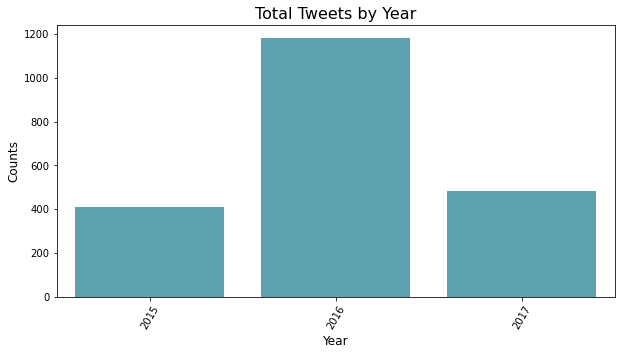

In [57]:
#bar graph
fig = plt.figure(figsize=(10,5))
sns.barplot(x=year_counts.index.year, y=year_counts, color='#4fabbc' )
plt.ylabel('Counts',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title('Total Tweets by Year',fontsize=16)
plt.xticks(rotation=60);

```2016``` has the number of tweets among other years

## **Three Insights**

### 1. What is the average rating for dogs?

In [58]:
df['rating_numerator'].mean()

13.697349397590362

The average rating for dogs is ```13.7```

### 2. What is the average rating for each dog stage?

In [59]:
#group by dog stage for average rating mean
df.groupby(by='dog_stages', as_index=False).mean()[['dog_stages','rating_numerator']]

,dog_stages,rating_numerator
0,doggo,11.879518
1,doggofloofer,11.000000
2,doggopupper,11.250000
3,doggopuppo,13.000000
4,floofer,11.888889
5,pupper,10.853061
6,puppo,12.103448


```Doggopuppo``` stage has the average rating of ```13``` while the ```Pupper``` has the average rating of ```10.9```

### 3. what are the top five dog breed with the highest average ratings

In [60]:
#group by p3
bread_rating=df.groupby(by='p3', as_index=False).mean()[['p3','rating_numerator']]
#top five ratings
bread_rating.nlargest(5,'rating_numerator',)

,p3,rating_numerator
22,Banana,420.000000
44,Black-footed_ferret,363.800000
305,Rottweiler,105.700000
327,Shower_curtain,68.333333
297,Redbone,68.285714


Top five breeds with highest average ratings are ```Banana Black-footed_ferret Rottweiler Shower_curtain Redbone```